# Quantum Phase Estimtion

In [1]:
from qiskit import QuantumCircuit,Aer,execute
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import operator

pi=np.pi

In [2]:
def QPE(theta,c):
    #creation of the phase circuit
    n=1#
    qc=QuantumCircuit(c+n,c)

    qc.h(range(c))

    init_st=[0,1]

    qc.initialize(init_st,c+n-1)

    for i in range(c):
        exp=2**(i)
        qc.cp(2*pi*theta*exp,i,c+n-1)

    #working for theta
    qc.append(QFT(c).inverse(),range(c))

    for i in range(c):
        qc.measure(i,i)

    display(qc.draw())
    backend=Aer.get_backend('qasm_simulator')
    counts=execute(qc,backend=backend,shots=1000).result().get_counts()
    display(plot_histogram(counts))
    highest_p_outcome=max(counts.items(),key=operator.itemgetter(1))
    measured_theta=int(highest_p_outcome[0],2)/2**c
    print(f'measured theta =',measured_theta,'with ',c,'qubits')

┌───┐                                                    ┌───────┐»
q_0: ───────┤ H ├────────■───────────────────────────────────────────┤0      ├»
            ├───┤        │                                           │       │»
q_1: ───────┤ H ├────────┼─────────■─────────────────────────────────┤1      ├»
            ├───┤        │         │                                 │  IQFT │»
q_2: ───────┤ H ├────────┼─────────┼──────────■──────────────────────┤2      ├»
            ├───┤        │         │          │                      │       │»
q_3: ───────┤ H ├────────┼─────────┼──────────┼───────────■──────────┤3      ├»
     ┌──────┴───┴──────┐ │P(7π/5)  │P(14π/5)  │P(17.593)  │P(35.186) └───────┘»
q_4: ┤ Initialize(0,1) ├─■─────────■──────────■───────────■───────────────────»
     └─────────────────┘                                                      »
c: 4/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐         
«q_0: ┤M├─────────
«     └╥┘┌─┐      
«q_1: ─╫─┤M├──────
«      ║ └╥┘┌─┐   
«q_2: ─╫──╫─┤M├───
«      ║  ║ └╥┘┌─┐
«q_3: ─╫──╫──╫─┤M├
«      ║  ║  ║ └╥┘
«q_4: ─╫──╫──╫──╫─
«      ║  ║  ║  ║ 
«c: 4/═╩══╩══╩══╩═
«      0  1  2  3

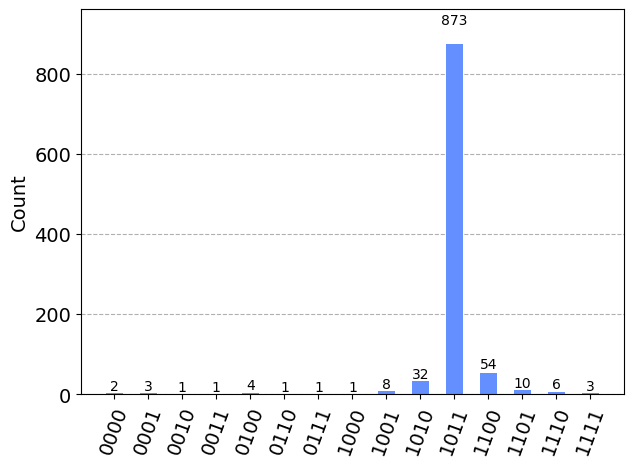

measured theta = 0.6875 with  4 qubits


In [3]:
QPE(0.7,4)

┌───┐                                                    »
 q_0: ───────┤ H ├────────■───────────────────────────────────────────»
             ├───┤        │                                           »
 q_1: ───────┤ H ├────────┼─────────■─────────────────────────────────»
             ├───┤        │         │                                 »
 q_2: ───────┤ H ├────────┼─────────┼──────────■──────────────────────»
             ├───┤        │         │          │                      »
 q_3: ───────┤ H ├────────┼─────────┼──────────┼───────────■──────────»
             ├───┤        │         │          │           │          »
 q_4: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
             ├───┤        │         │          │           │          »
 q_5: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
             ├───┤        │         │          │           │          »
 q_6: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
             ├───┤        │         │          │           │          »
 q_7: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
             ├───┤        │         │          │           │          »
 q_8: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
             ├───┤        │         │          │           │          »
 q_9: ───────┤ H ├────────┼─────────┼──────────┼───────────┼──────────»
      ┌──────┴───┴──────┐ │P(7π/5)  │P(14π/5)  │P(17.593)  │P(35.186) »
q_10: ┤ Initialize(0,1) ├─■─────────■──────────■───────────■──────────»
      └─────────────────┘                                             »
c: 10/════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                              »
« q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_1: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_2: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_3: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_4: ─■──────────────────────────────────────────────────────────────────────»
«       │                                                                      »
« q_5: ─┼───────────■──────────────────────────────────────────────────────────»
«       │           │                                                          »
« q_6: ─┼───────────┼───────────■──────────────────────────────────────────────»
«       │           │           │                                              »
« q_7: ─┼───────────┼───────────┼───────────■──────────────────────────────────»
«       │           │           │           │                                  »
« q_8: ─┼───────────┼───────────┼───────────┼───────────■──────────────────────»
«       │           │           │           │           │                      »
« q_9: ─┼───────────┼───────────┼───────────┼───────────┼───────────■──────────»
«       │P(70.372)  │P(140.74)  │P(281.49)  │P(562.97)  │P(1125.9)  │P(2251.9) »
«q_10: ─■───────────■───────────■───────────■───────────■───────────■──────────»
«                                                                              »
«c: 10/════════════════════════════════════════════════════════════════════════»
«                                                                              »
«      ┌───────┐┌─┐                           
« q_0: ┤0      ├┤M├───────────────────────────
«      │       │└╥┘┌─┐                        
« q_1: ┤1      ├─╫─┤M├────────────────────────


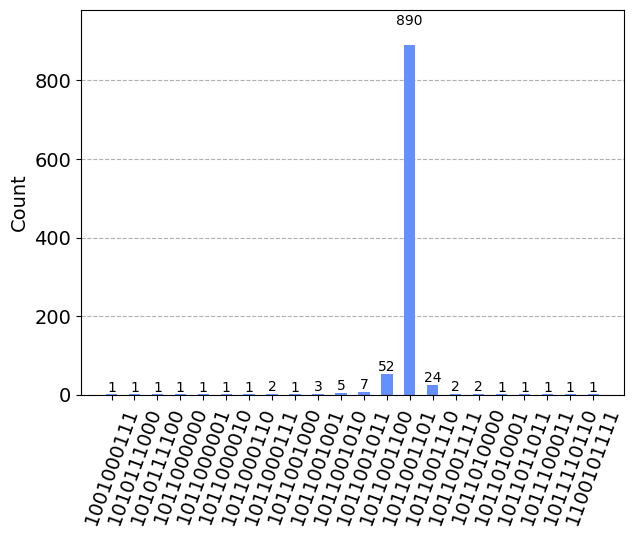

measured theta = 0.7001953125 with  10 qubits


In [4]:
QPE(0.7,10)